In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import optuna
import lightgbm as lgb

from src.eda.plot_distribution import plot_distribution, compare_dataframes
from src.preprocess import bin_column_by_custom_quantiles, bin_column_by_quantile, convert_edu, convert_marital_status, fill_missing_categorical, label_encode_datasets, remove_spaces
from src.model.lgbm import LGBM

/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data

In [3]:
df1 = pd.read_excel('../dataset/train.xlsx')
df2 = pd.read_excel('../dataset/test.xlsx')

In [4]:
train = df1.copy()
test = df2.copy()

In [5]:
train.head()

,id,age,sector,edu,marital_status,field,family_rel,gender,investment_gain,investment_loss,working_hours,high_income
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,no
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,no
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,no
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,no
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,no


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               32561 non-null  int64 
 1   age              32561 non-null  int64 
 2   sector           32561 non-null  object
 3   edu              32561 non-null  object
 4   marital_status   32561 non-null  object
 5   field            32561 non-null  object
 6   family_rel       32561 non-null  object
 7   gender           32561 non-null  object
 8   investment_gain  32561 non-null  int64 
 9   investment_loss  32561 non-null  int64 
 10  working_hours    32561 non-null  int64 
 11  high_income      32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               16281 non-null  int64 
 1   age              16281 non-null  int64 
 2   sector           16281 non-null  object
 3   edu              16281 non-null  object
 4   marital_status   16281 non-null  object
 5   field            16281 non-null  object
 6   family_rel       16281 non-null  object
 7   gender           16281 non-null  object
 8   investment_gain  16281 non-null  int64 
 9   investment_loss  16281 non-null  int64 
 10  working_hours    16281 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.4+ MB


# EDA

### Compare distribution of train and test set

edu is categorical


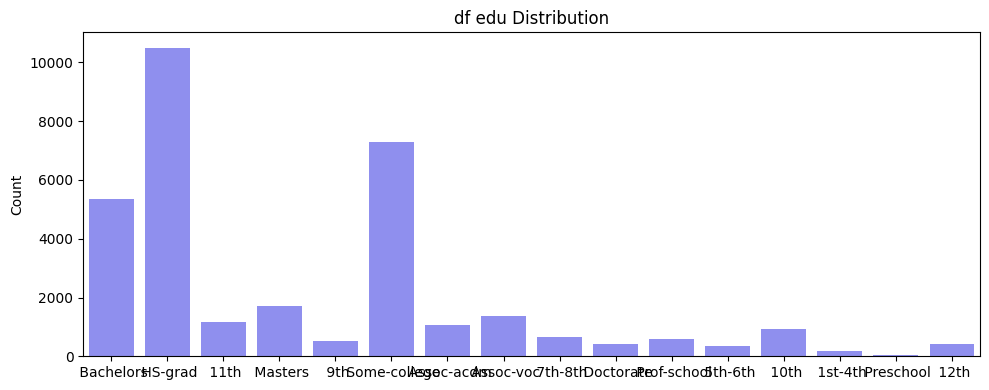

In [8]:
plot_distribution(train, 'edu')

edu is categorical


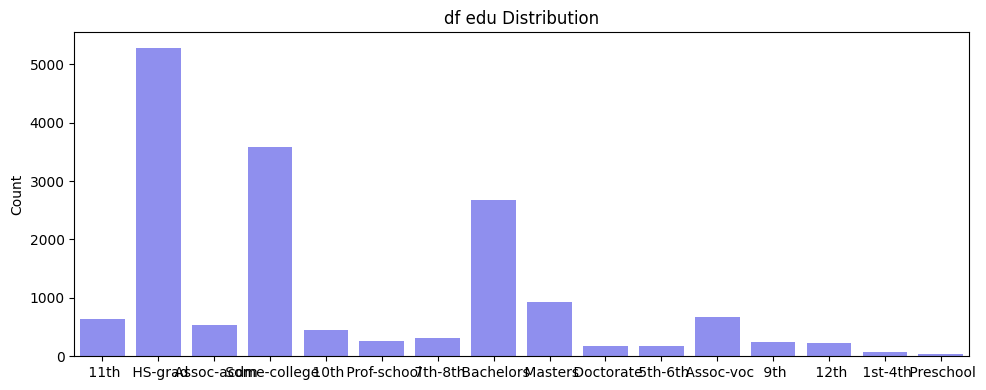

In [9]:
plot_distribution(test, 'edu')

# Pre-processing

In [10]:
from src.preprocess import preprocess_pipeline

train = preprocess_pipeline(train)

# Model

### Hyperparameter tuning

In [11]:
from src.model.lgbm import LGBM

In [12]:
model = LGBM(train)
model.finetune(n_trials=5)

[I 2024-06-26 18:52:56,963] A new study created in memory with name: no-name-bf920de2-64cd-4884-9853-44d164bc3d08
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call th

TRAIN: Trial 0 - Accuracy: 0.8170664318323538, F1: 0.5615499917225686, Precision: 0.6640621553834463, Recall: 0.4866085051906942, AUC: 0.8511355010183405
VALID: Trial 0 - Accuracy: 0.8168053894101799, F1: 0.5610244247786648, Precision: 0.6635547769601235, Recall: 0.4862927771491005, AUC: 0.8508577487604014


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 1 - Accuracy: 0.8605309974195297, F1: 0.6764871625602594, Precision: 0.7662884500571202, Recall: 0.6055669422240441, AUC: 0.9176786047673368
VALID: Trial 1 - Accuracy: 0.8588801229519791, F1: 0.6730989572706736, Precision: 0.7613015773402004, Recall: 0.6032390154914739, AUC: 0.9150594873980209


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 2 - Accuracy: 0.8337351211235525, F1: 0.6036286711379883, Precision: 0.708438218671522, Recall: 0.5259852264076363, AUC: 0.8857836602319888
VALID: Trial 2 - Accuracy: 0.8326525412603258, F1: 0.6010959030919535, Precision: 0.7053924194561898, Recall: 0.5237851354691017, AUC: 0.8845769319481034


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 3 - Accuracy: 0.816344709467406, F1: 0.5583466430955135, Precision: 0.6632790778060824, Recall: 0.4820813640496849, AUC: 0.8481966161347578
VALID: Trial 3 - Accuracy: 0.8165904394197808, F1: 0.5589969877707179, Precision: 0.6640230630656379, Recall: 0.482720210455119, AUC: 0.8478426060414777


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 4 - Accuracy: 0.8670725651420688, F1: 0.6986454904297817, Precision: 0.7693181195498184, Recall: 0.6398737797964714, AUC: 0.925238831804782
VALID: Trial 4 - Accuracy: 0.8635176254936734, F1: 0.6900825714134883, Precision: 0.7614210468849804, Recall: 0.6310426178119432, AUC: 0.9209465283163206


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

TRAIN: Trial 5 - Accuracy: 0.857605718770135, F1: 0.6643529146007723, Precision: 0.768312710333954, Recall: 0.5852252842193788, AUC: 0.9129813693748086
VALID: Trial 5 - Accuracy: 0.8565767963223052, F1: 0.661777559120762, Precision: 0.7658755105047719, Recall: 0.5827055774508656, AUC: 0.9113490357656564


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Code/MidTerm/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optun

KeyboardInterrupt: 

# Infer

In [18]:
import joblib
import pandas as pd

model = joblib.load('../weights/best_lgbm2.pkl')

test.head()

,id,age,sector,edu,marital_status,field,family_rel,gender,investment_gain,investment_loss,working_hours,age_binned,edu_new,marital_status_new
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,1,undergrad,single
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,3,undergrad,married
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,2,grad,married
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,4,grad,married
4,32566,18,?,Some-college,Never-married,?,Own-child,Female,0,0,30,1,grad,single
